### Face Recognition Using SVM

Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make sure to provide proper descriptions as MarkDown for each section of your code.

*imports*

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

%matplotlib inline

## __a.__

Download the dataset “Face” from CSNS. Check out the dataset. Open some of the jpg images. This is the Oivetti database of face images from AT&T research lab. It includes 400 faces (64x64 pixels) from 40 people (10 images per person).
You have to also download the csv file that includes the labels of the images (the label is person’s ID). The goal is to build a Face Recognition algorithm to recognize each person using PCA dimensionality reduction and a non-linear SVM.
you can use:

`mpimg.imread(file_name)` to load an image, and

`plt.imshow(image_name, cmap=plt.cm.gray)` to show an image (This is a little different from what we had in HW2!).

Add `%matplotlib inline` at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

*show jpg images*

(64, 64)


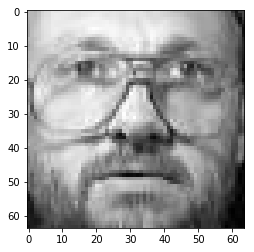

In [3]:
file_name = "Face/0.jpg"
image_name = mpimg.imread(file_name)
print(image_name.shape)
plt.imshow(image_name, cmap=plt.cm.gray)

*download csv*

In [4]:
face_map = pd.read_csv("label.csv")
face_map.head()

,Label
0,13
1,30
2,34
3,19
4,24


## __b.__

Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 64x64 image into a row of the feature matrix with 4096 columns.

*helper method*

In [5]:
# reads a directory of images, flattens the features to a single row then returns as a dataframe
def extract_features(file_path, features):
    new_df = []
    for feature in range(len(features)):
        x = mpimg.imread(file_path + str(feature) + ".jpg")
        image_flat = x.flatten()
        new_df.append(image_flat)
    return pd.DataFrame(new_df)

*import images and extract features*

In [6]:
file_path = "Face/"

X = extract_features(file_path, face_map)
y = face_map["Label"]

In [7]:
print(X.shape)
print(y.shape)

(400, 4096)
(400,)


In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


In [9]:
y.head()

0    13
1    30
2    34
3    19
4    24
Name: Label, dtype: int64

## __c.__

Normalize each column of your feature matrix (This is required!).

In [10]:
std_scaler = StandardScaler()
#std_scaler = MinMaxScaler()
X_norm = std_scaler.fit_transform(X)

In [11]:
print(X_norm)

[[ 1.37649641  1.11885303  0.79610373 ... -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...  1.84210291  1.84204144
   1.13304942]
 ...
 [ 0.98723729  1.02022861  1.01972837 ... -0.58507555 -0.48342554
  -0.38764832]
 [ 0.68259971  0.52710647  0.34885444 ...  0.88797069  0.63687242
   0.71831368]
 [-0.231313   -0.67282406 -1.0088666  ... -0.06616154 -0.55132239
  -0.50861291]]


## __d.__

Use sklearn functions to split the Normalized dataset into testing and training sets with the
following parameters: `test_size=0.25`, `random_state=5`.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=5)

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (300, 4096)
X_test shape: (100, 4096)
y_train shape: (300,)
y_test shape: (100,)


## __e.__

The dimensionality of the data samples is 4096. Use PCA to reduce the dimensionality from 4096 to 50 (i.e. only 50 principal components!). You should “fit” your PCA on your __training set only__, and then use this fitted model to “transform” both training and testing sets (When you finish this step, the number of columns in your testing and training sets should be 50). We will cover the details of PCA in next session of class. For now, you can use this format:

`from sklearn.decomposition import PCA`

`k = 50` # (k is the number of components (new features) after dimensionality reduction)

`my_pca = PCA(n_components = k)`

__#X_Train is feature matrix of training set before dimensionality reduction,__

__#X_Train_New is feature matrix of training set after dimensionality reduction:__

`X_Train_new = my_pca.fit_transform(X_Train)`

`X_Test_new = my_pca.transform(X_Test)`

In [14]:
k = 50
my_pca = PCA(n_components=k)

*fit then transform*

In [15]:
X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)

In [16]:
print(X_train_new.shape)
print(X_test_new.shape)

(300, 50)
(100, 50)


## __f.__

Design and Train a non-linear SVM classifier to recognize the face based on the training dataset that you built in part _(d)_.

Use:

`SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)`

Then, __test__ your SVM on testing set (from part _(d)_ ), and __calculate and report__ the __accuracy__.

Also, __calculate and report__ the __Confusion Matrix__.

*design and train*

In [17]:
svm_face = SVC(C=1, kernel="rbf", gamma=0.0005, random_state=1)

svm_face.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

*test/predict*

In [18]:
y_predict = svm_face.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_predict).sum() )
print("\nSVM Faces Prediction:\n", y_predict)

Misclassified samples: 14

SVM Faces Prediction:
 [16 32 39 22 29 28 21 12 23 28  9 13 29 21 10  1 36 11 39 16  8 26 19 12
 35  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18
  4 36  3 17  3  3  3 36  4 36  5  6 14  9 13  7  9 22  6  6  3  0  4 31
 31 37 14 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 39 36 33
 32 13 38 20]


*accuracy*

In [19]:
accuracy = accuracy_score(y_test, y_predict)

print('Accuracy: %.2f' % accuracy)

Accuracy: 0.86


*confusion matrix*

In [20]:
cm_face = confusion_matrix(y_test, y_predict)
print("\nConfusion Maxtrix:\n\n", cm_face)


Confusion Maxtrix:

 [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


## __g.__

Now, use `GridSearchCV` to __find the best value for parameter `C`__ in your SVM.

__Search__ in this list: `[0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]`.

Remember that we want to __use cross-validation method__ (`GridSearchCV`) to find the best `C`.

Thus, you can again __merge__ `X_train_new` and `X_test_new` (*after dimensionality reduction*), and also __merge__ `y_train` and `y_test`, and then use `GridSearchCV` with __10-fold cross validation__ to __find `C`__.

*new SVM*

In [21]:
new_SVM = SVC(C=1, kernel="rbf", gamma=0.0005, random_state=1)

*merge data*

In [22]:
X_std_combined = np.vstack((X_train_new, X_test_new) )
y_combined = y_train.append(y_test, ignore_index=True)

In [23]:
print(X_std_combined.shape)
print(y_combined.shape)

(400, 50)
(400,)


*fit new SVM*

In [24]:
new_SVM.fit(X_std_combined, y_combined)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

*init GridSearchCV*

In [25]:
search_list = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

param_grid = dict(C = search_list)

grid = GridSearchCV(
    new_SVM,
    param_grid,
    cv=10,
    scoring="accuracy"
)

*find best accuracy*

In [26]:
grid.fit(X_std_combined, y_combined)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

*report best accuracy*

In [27]:
print("Score", grid.best_score_)

Score 0.9625


*report best C*

In [28]:
print("\nBest C:", grid.best_params_)


Best C: {'C': 10}
